# Capstone Project - Sunny Side Up! - Cleaning and Initial EDA

## Importing the data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataset="ninja.csv"
df = pd.read_csv(dataset, low_memory=False)

In [4]:
#Units: time in UTC, other columns are average weather variables, land area weighted. 
#precipitation in mm/hour (PRECTOTLAND in MERRA-2). 
#temperature at 2 metres above ground in degrees C (T2M in MERRA-2). 
#irradiance at ground level (_surface) and top of atmosphere (_toa) in W/m^2 (SWGDN and SWTDN in MERRA-2). 
#snowfall in mm/hour (PRECSNOLAND in MERRA-2). 
#snow_mass in kg/m^2 (SNOMAS in MERRA-2). 
#cloud_cover as a fraction [0,1] (CLDTOT in MERRA-2). 
#air_density at ground level in kg/m^3 (RHOA in MERRA-2).

# Looking at the data and preparing it

In [5]:
df.head()

,time,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
0,01/01/1980 00:00,0.0194,-1.175,0.0,0.0,0.0101,3.2220,0.8601,1.2681
1,01/01/1980 01:00,0.0185,-1.360,0.0,0.0,0.0093,3.2326,0.8550,1.2691
2,01/01/1980 02:00,0.0175,-1.522,0.0,0.0,0.0094,3.2432,0.8347,1.2703
3,01/01/1980 03:00,0.0153,-1.586,0.0,0.0,0.0074,3.2528,0.8083,1.2710
4,01/01/1980 04:00,0.0128,-1.599,0.0,0.0,0.0060,3.2606,0.7754,1.2710


In [6]:
df.shape

(350640, 9)

In [7]:
df.describe()

,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
count,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000
mean,0.115559,8.775669,128.919179,264.447818,0.004328,0.387886,0.650362,1.227531
std,0.151613,5.090149,193.955010,346.316367,0.022665,1.386117,0.214014,0.025482
min,0.000000,-7.534000,0.000000,0.000000,0.000000,0.000000,0.001700,1.147600
25%,0.020200,4.880000,0.000000,0.000000,0.000000,0.000000,0.496200,1.208300
50%,0.060200,8.534000,6.294650,30.890500,0.000000,0.000000,0.666700,1.224800
75%,0.150800,12.527000,205.197125,487.314200,0.000100,0.086400,0.826000,1.244900
max,2.838100,25.854000,889.937900,1128.102800,1.182600,24.796300,0.997900,1.322100


In [8]:
df.isnull().sum()
#Note no nulls because 0 is used for when it's not the case - example no snowfall is a 0 in snowfall.

time                  0
precipitation         0
temperature           0
irradiance_surface    0
irradiance_toa        0
snowfall              0
snow_mass             0
cloud_cover           0
air_density           0
dtype: int64

In [9]:
#Only useful columns are temperature, precipitation, snowfall, cloud_cover. 
#Snow_mass is not useful as it does not really show the weather as much as the condition outside. You can see if snow settled by looking out the window. 
#Irradiance and air density are not useful for basic weather estimates.

In [10]:
#So time to drop all the columns not useful:

In [11]:
df.drop(columns='irradiance_surface',inplace=True)

In [12]:
df.drop(columns='irradiance_toa',inplace=True)

In [13]:
df.drop(columns='air_density',inplace=True)

In [14]:
df.drop(columns='snow_mass',inplace=True)

In [15]:
df.head()

,time,precipitation,temperature,snowfall,cloud_cover
0,01/01/1980 00:00,0.0194,-1.175,0.0101,0.8601
1,01/01/1980 01:00,0.0185,-1.360,0.0093,0.8550
2,01/01/1980 02:00,0.0175,-1.522,0.0094,0.8347
3,01/01/1980 03:00,0.0153,-1.586,0.0074,0.8083
4,01/01/1980 04:00,0.0128,-1.599,0.0060,0.7754


In [16]:
df.dtypes

time              object
precipitation    float64
temperature      float64
snowfall         float64
cloud_cover      float64
dtype: object

In [17]:
#Now that all it's sorted, the date and time column needs splitting into two columns for data and time.

In [18]:
df[['date', 'time']] = df['time'].str.split(' ', 1, expand=True)

In [19]:
df.head()

,time,precipitation,temperature,snowfall,cloud_cover,date
0,00:00,0.0194,-1.175,0.0101,0.8601,01/01/1980
1,01:00,0.0185,-1.360,0.0093,0.8550,01/01/1980
2,02:00,0.0175,-1.522,0.0094,0.8347,01/01/1980
3,03:00,0.0153,-1.586,0.0074,0.8083,01/01/1980
4,04:00,0.0128,-1.599,0.0060,0.7754,01/01/1980


In [20]:
#Now date should be set to the correct data type:

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [22]:
df.head()

,time,precipitation,temperature,snowfall,cloud_cover,date
0,00:00,0.0194,-1.175,0.0101,0.8601,1980-01-01
1,01:00,0.0185,-1.360,0.0093,0.8550,1980-01-01
2,02:00,0.0175,-1.522,0.0094,0.8347,1980-01-01
3,03:00,0.0153,-1.586,0.0074,0.8083,1980-01-01
4,04:00,0.0128,-1.599,0.0060,0.7754,1980-01-01


In [23]:
df.dtypes

time                     object
precipitation           float64
temperature             float64
snowfall                float64
cloud_cover             float64
date             datetime64[ns]
dtype: object

In [24]:
#Winning because date is now actually usable. Time can stay an object since it will go away soon enough!

In [25]:
#Set date as index for ease:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [26]:
df.head(24)

,time,precipitation,temperature,snowfall,cloud_cover
date,,,,,
1980-01-01,00:00,0.0194,-1.175,0.0101,0.8601
1980-01-01,01:00,0.0185,-1.360,0.0093,0.8550
1980-01-01,02:00,0.0175,-1.522,0.0094,0.8347
1980-01-01,03:00,0.0153,-1.586,0.0074,0.8083
1980-01-01,04:00,0.0128,-1.599,0.0060,0.7754
1980-01-01,05:00,0.0126,-1.635,0.0055,0.7461
1980-01-01,06:00,0.0156,-1.706,0.0064,0.7197
1980-01-01,07:00,0.0191,-1.768,0.0070,0.6984
1980-01-01,08:00,0.0214,-1.787,0.0067,0.6618


In [27]:
#I want all entries between 9pm and 6am removed as we don't care about the weather at night. So 10-5 will go.

In [28]:
df=df[df['time']!='22:00']

In [29]:
df=df[df['time']!='23:00']

In [30]:
df=df[df['time']!='00:00']

In [31]:
df=df[df['time']!='01:00']

In [32]:
df=df[df['time']!='02:00']

In [33]:
df=df[df['time']!='03:00']

In [34]:
df=df[df['time']!='04:00']

In [35]:
df=df[df['time']!='05:00']

In [36]:
df.head(20)

,time,precipitation,temperature,snowfall,cloud_cover
date,,,,,
1980-01-01,06:00,0.0156,-1.706,0.0064,0.7197
1980-01-01,07:00,0.0191,-1.768,0.0070,0.6984
1980-01-01,08:00,0.0214,-1.787,0.0067,0.6618
1980-01-01,09:00,0.0254,-1.454,0.0060,0.6139
1980-01-01,10:00,0.0288,-0.782,0.0059,0.5680
1980-01-01,11:00,0.0287,-0.229,0.0046,0.5082
1980-01-01,12:00,0.0260,0.090,0.0037,0.4487
1980-01-01,13:00,0.0219,0.110,0.0043,0.3863
1980-01-01,14:00,0.0164,-0.367,0.0041,0.3344


In [37]:
#Time is no longer of use now since now we want only one entry per date:
df.drop(columns='time',inplace=True)

In [38]:
df.head()

,precipitation,temperature,snowfall,cloud_cover
date,,,,
1980-01-01,0.0156,-1.706,0.0064,0.7197
1980-01-01,0.0191,-1.768,0.0070,0.6984
1980-01-01,0.0214,-1.787,0.0067,0.6618
1980-01-01,0.0254,-1.454,0.0060,0.6139
1980-01-01,0.0288,-0.782,0.0059,0.5680


In [39]:
#Now to make one entry per date with the mean of all the entries for that day:

In [40]:
df=df.groupby('date').mean()

In [41]:
df.head()

,precipitation,temperature,snowfall,cloud_cover
date,,,,
1980-01-01,0.015669,-1.484125,0.003950,0.414306
1980-01-02,0.033400,-1.885250,0.006031,0.765469
1980-01-03,0.669869,3.591813,0.066838,0.991975
1980-01-04,0.075338,3.927437,0.000581,0.627756
1980-01-05,0.077675,4.829875,0.000000,0.512463


In [42]:
df.shape

(14610, 4)

In [43]:
#Nr of days in 40 years without leap year accounting: 14600. Adding leap years, seems about right for shape. 
#So just another way to feel confident in what we found. 

In [44]:
#Note: one extra bit of cleaning was needed after modelling was attempted: resampling to get weekly entries instead of daily.
#This can be found in the modelling notebooks.

In [45]:
#This is all the cleaning and prep at this stage so a good plan would be to export it to be used in a separate notebook for modelling.
#The cell is commented out because I love to reset kernell and overwrite stuff.

In [46]:
#df.to_csv('modelling_data.csv',index=True)

## EDA Time

More EDA will take place for each feature in its relevant notebook where modelling takes place, this is just some day one EDA I have done.

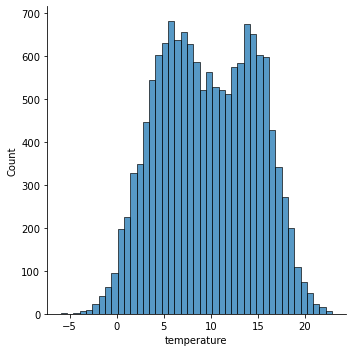

In [47]:
#Lets look at the distribution of temeperature values:
sns.displot(df,x='temperature')
plt.show()

In [48]:
def scatter_plot(feature_1, feature_2):
    plt.figure(figsize=(10,10)) 
    plt.scatter(data=df, x=feature_1, y=feature_2)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.show()

In [49]:
#Lets look at the relationship between precipitation and cloud cover.
#We can see that it can be really cloudy and not rain, however in order for precipitation to be recorded there is a certain amount of cloud cover needed.
#This will be useful when I find out that precipitation models are bad so I have to use cloud cover as an inderect way to predict rain.

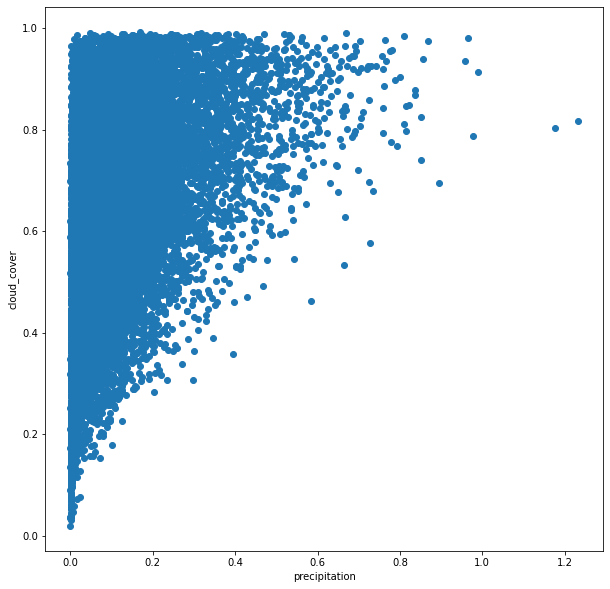

In [50]:
scatter_plot('precipitation','cloud_cover')

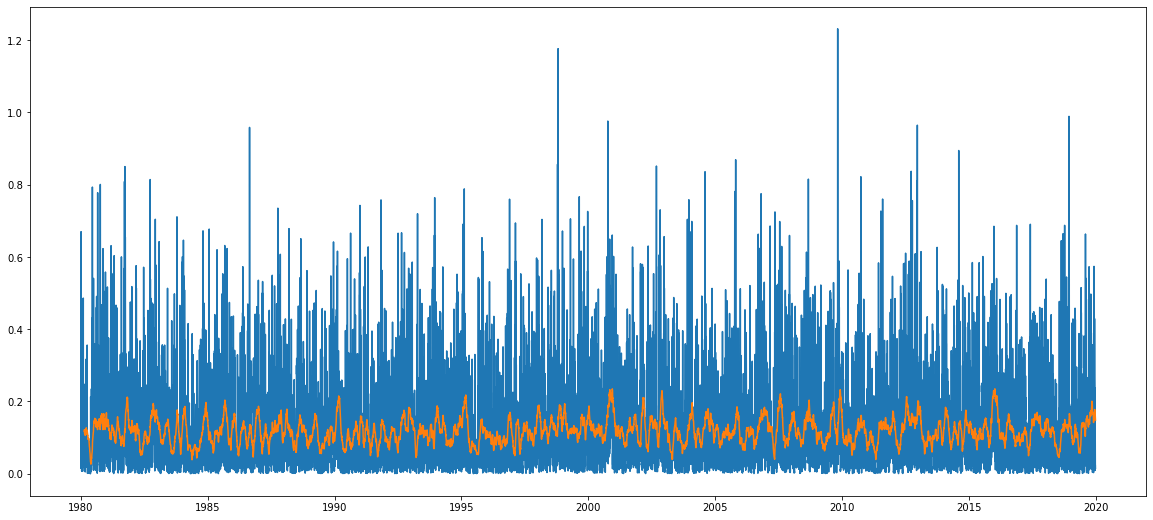

In [51]:
plt.figure(figsize=(20,9))
plt.plot(df['precipitation'])
plt.plot(df['precipitation'].rolling(50).mean())

In [52]:
#We can see precipitation is just chaos.

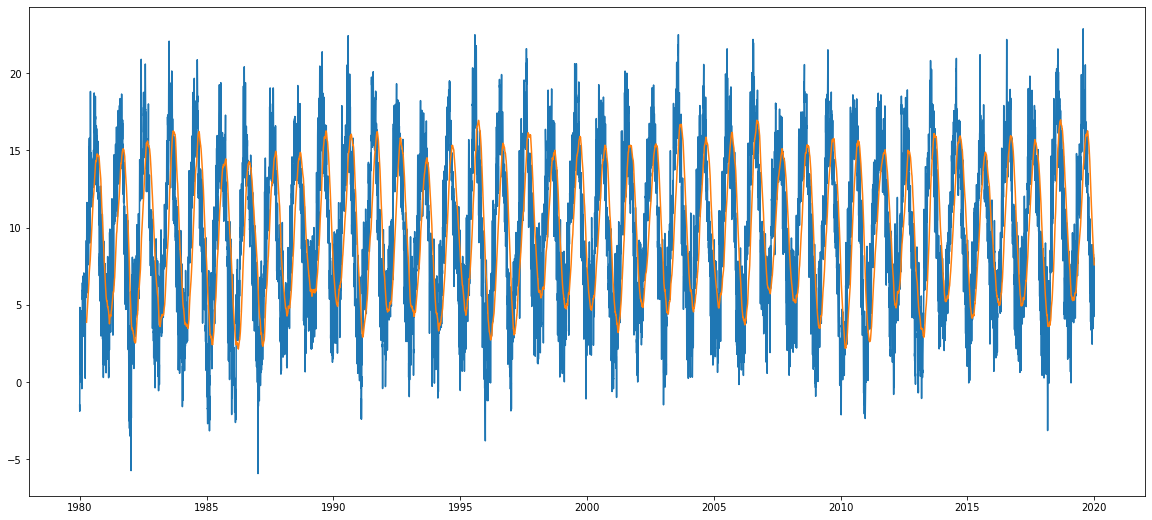

In [53]:
plt.figure(figsize=(20,9))
plt.plot(df['temperature'])
plt.plot(df['temperature'].rolling(100).mean())

In [54]:
#Temperature is pretty so that will probably model well!

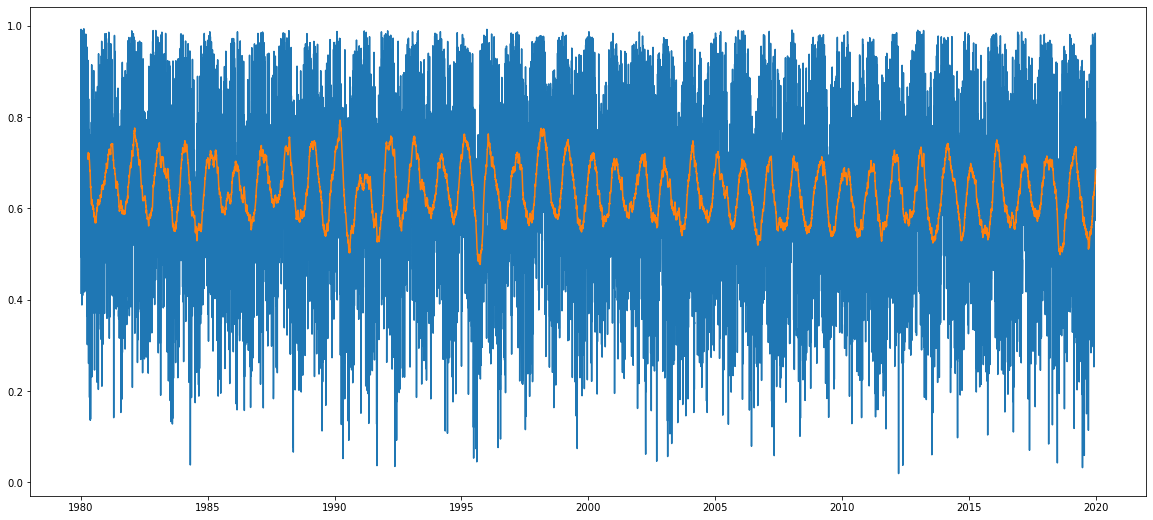

In [55]:
plt.figure(figsize=(20,9))
plt.plot(df['cloud_cover'])
plt.plot(df['cloud_cover'].rolling(100).mean())

In [56]:
#So cloud cover is not nice but it has patterns so there's hope to it!

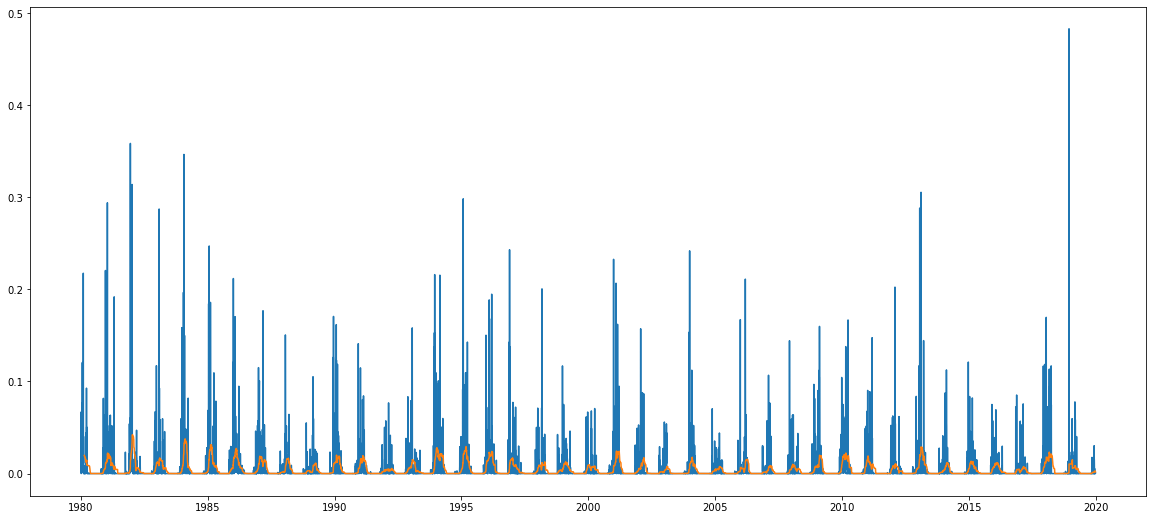

In [63]:
plt.figure(figsize=(20,9))
plt.plot(df['snowfall'])
plt.plot(df['snowfall'].rolling(50).mean())

In [ ]:
#Those are really cute tiny peaks!

In [57]:
#This is a look at some bits for the features:

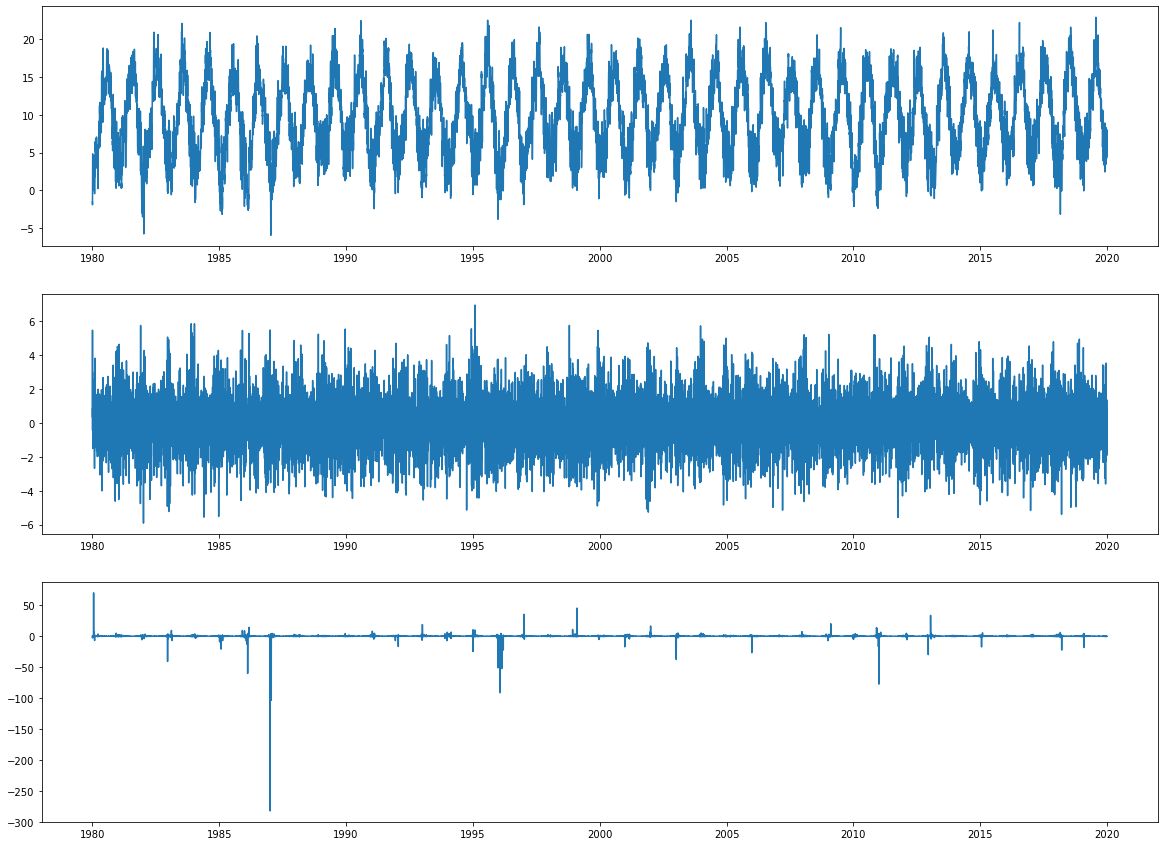

In [58]:
fig, axes = plt.subplots(nrows=3, figsize=(20,15))
axes[0].plot(df.temperature)
axes[1].plot(df.temperature.diff())
axes[2].plot(df.temperature.pct_change())

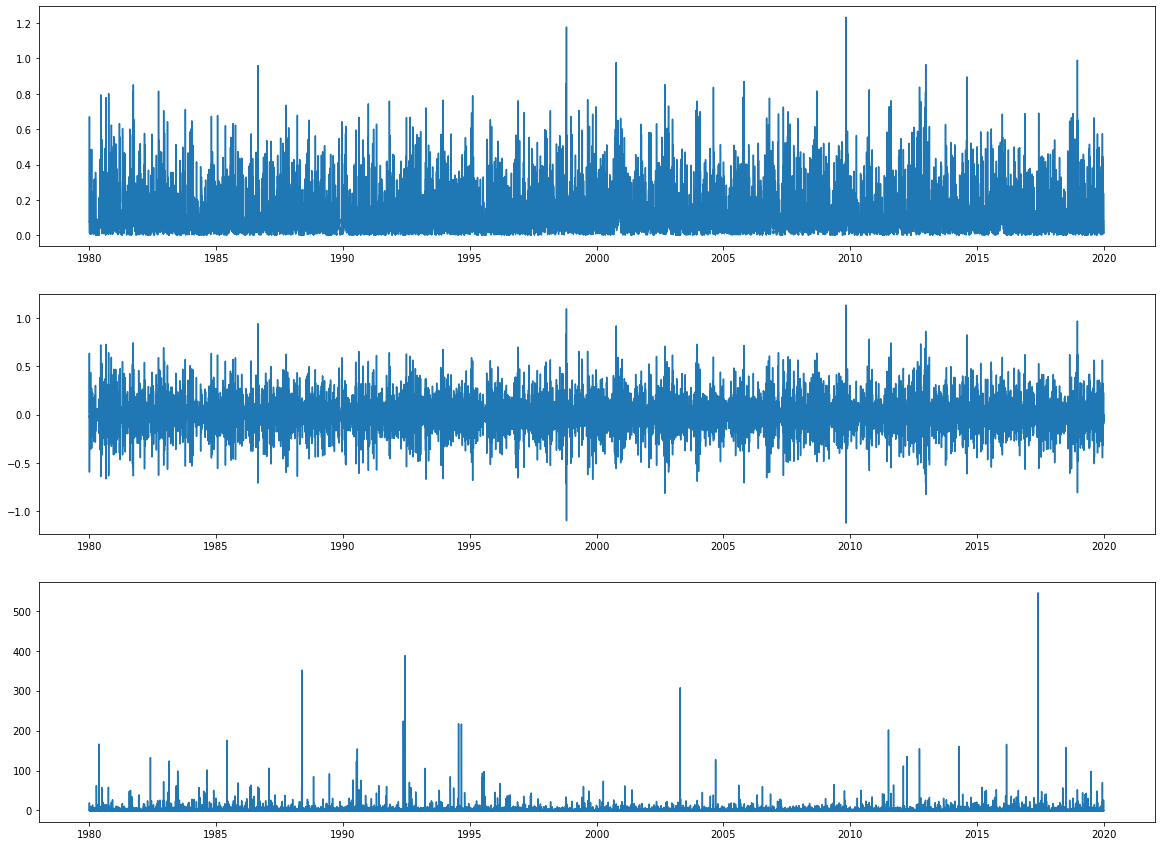

In [59]:
fig, axes = plt.subplots(nrows=3, figsize=(20,15))
axes[0].plot(df.precipitation)
axes[1].plot(df.precipitation.diff())
axes[2].plot(df.precipitation.pct_change())

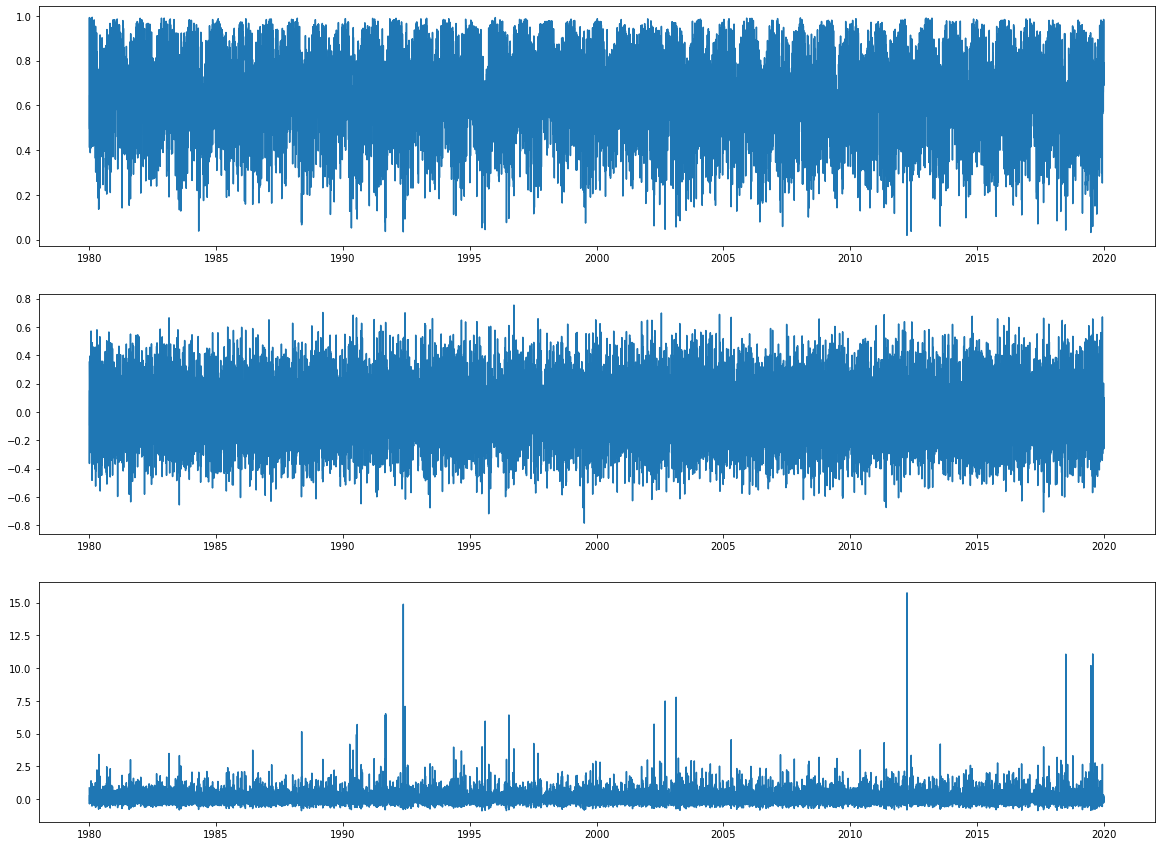

In [60]:
fig, axes = plt.subplots(nrows=3, figsize=(20,15))
axes[0].plot(df.cloud_cover)
axes[1].plot(df.cloud_cover.diff())
axes[2].plot(df.cloud_cover.pct_change())

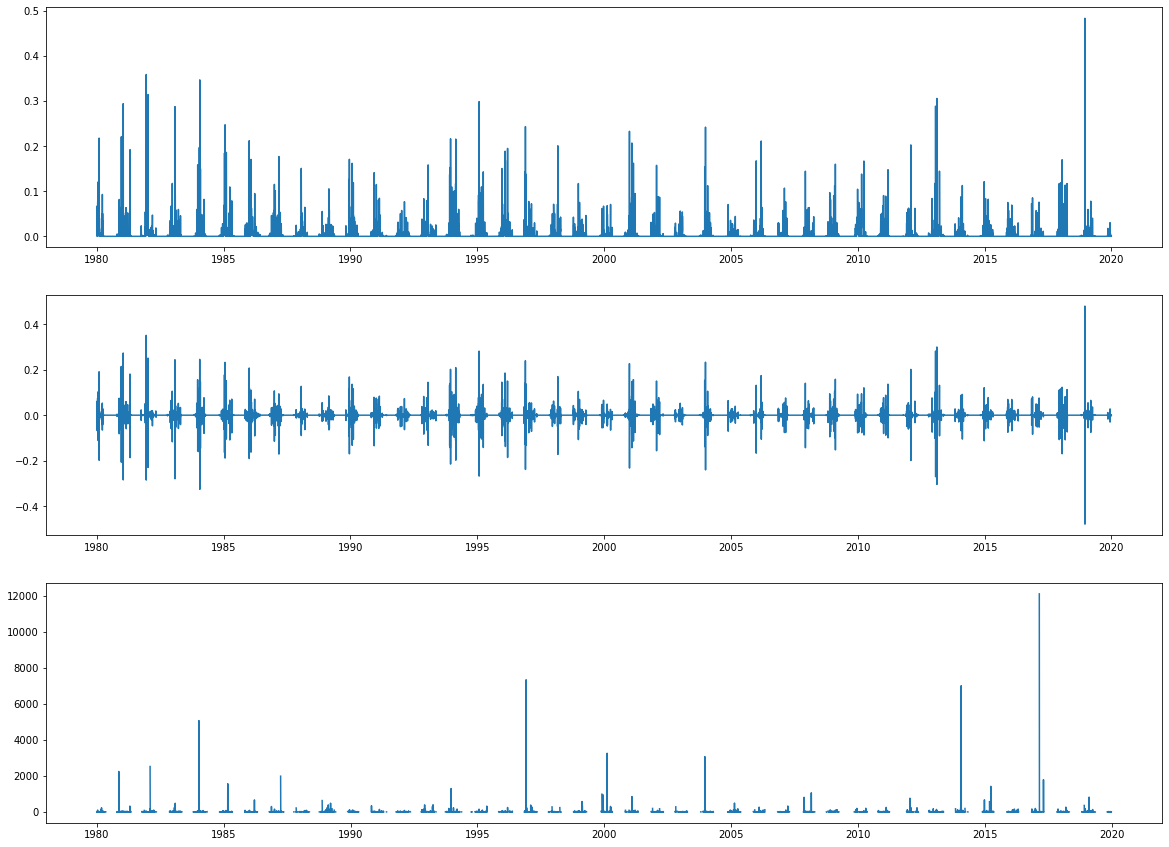

In [61]:
fig, axes = plt.subplots(nrows=3, figsize=(20,15))
axes[0].plot(df.snowfall)
axes[1].plot(df.snowfall.diff())
axes[2].plot(df.snowfall.pct_change())